In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [192]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [193]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [194]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [195]:
duplicates = customer_data.duplicated()
print(customer_data[duplicates])

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [196]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [197]:
for col in customer_data.columns:
    print(col,customer_data[col].unique())

CustomerID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Gender ['Male' 'Female']
Age [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 

In [198]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [199]:
#lets check outliers
def plot_boxplot(customer_data, column_name):
  plt.figure(figsize=(5, 3))
  sns.boxplot(customer_data[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.show()


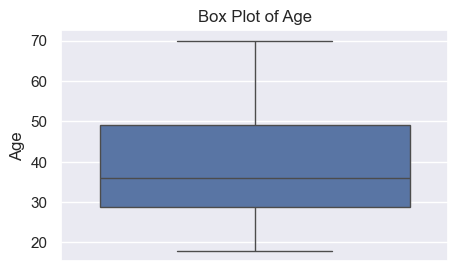

In [200]:
plot_boxplot(customer_data,"Age")

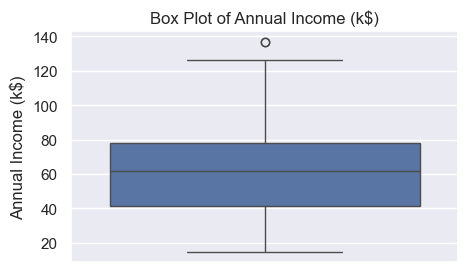

In [201]:
plot_boxplot(customer_data,"Annual Income (k$)")

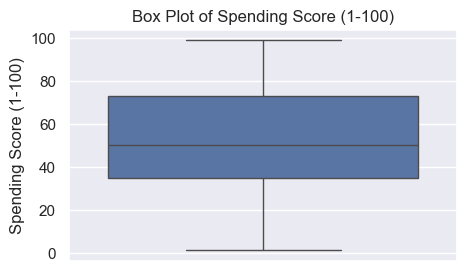

In [202]:
plot_boxplot(customer_data,"Spending Score (1-100)")

In [203]:
#handling categorica,l values
le = LabelEncoder()
customer_data['Gender'] = le.fit_transform(customer_data['Gender'])
 

In [204]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


determine the optimal number of clusters (k)

 Step 1: Try Different Numbers of Groups (k)
Try clustering with:

1 group → everything in 1 cluster

2 groups → split into 2 clusters

3 groups → split into 3 clusters

...

10 groups

For each k, you calculate WCSS — which tells you:

“How spread out are the points within each cluster?”

📉 Lower WCSS = tighter, better clusters

📉 Step 2: Plot WCSS vs. Number of Clusters (k)
Now you make a chart:

X-axis = Number of clusters

Y-axis = WCSS (how bad or good the clustering is)

At first, WCSS drops a lot (good!)
Then, the improvement slows down...

💡 Step 3: Find the "Elbow"
The “elbow” is the point where the line bends and stops improving quickly.

That’s your best k — because:

Before the elbow: adding clusters helps a lot

After the elbow: adding more clusters barely helps

inertia_ Uses Euclidean Distance Squared
👉 What it does:
For every point in your dataset:

Measure the Euclidean distance to its assigned cluster center (centroid)

Square it

Add all those up for all points

This total sum is called inertia (or WCSS).

In [206]:
X = customer_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [207]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

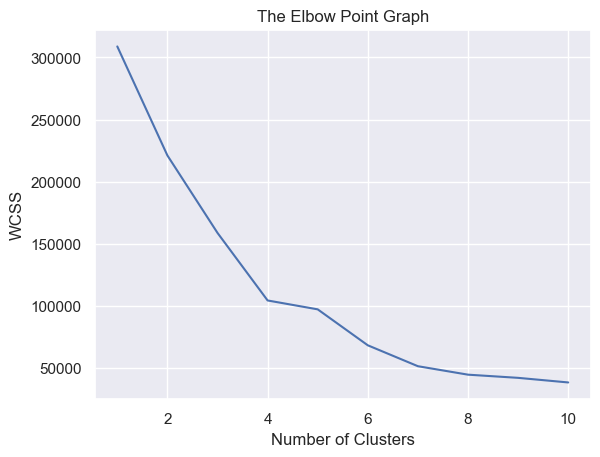

In [208]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [210]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [211]:
X['clusters']=Y
print(X)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  clusters
0         1   19                  15                      39         2
1         1   21                  15                      81         2
2         0   20                  16                       6         0
3         0   23                  16                      77         2
4         0   31                  17                      40         0
..      ...  ...                 ...                     ...       ...
195       0   35                 120                      79         1
196       0   45                 126                      28         3
197       1   32                 126                      74         1
198       1   32                 137                      18         3
199       1   30                 137                      83         1

[200 rows x 5 columns]


In [212]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


In [213]:
#analyze each cluster
cluster_summary = X.groupby('clusters').mean(numeric_only=True)
print(cluster_summary)


            Gender        Age  Annual Income (k$)  Spending Score (1-100)
clusters                                                                 
0         0.440000  54.060000           40.460000               36.720000
1         0.461538  32.692308           86.538462               82.128205
2         0.416667  25.250000           25.833333               76.916667
3         0.558824  41.647059           88.735294               16.764706
4         0.358491  33.396226           58.056604               48.773585


✅ Cluster Insights
🔷 Cluster 0
Metric	Value
Gender	0.44 → mostly female
Age	54.06 → older customers
Income	40.46 → low-to-mid income
Spending Score	36.72 → below average spending

🧠 Insight:
This group is older and modest in income. They don’t spend a lot. May respond to value deals or loyalty programs.

🔷 Cluster 1
Metric	Value
Gender	0.46 → balanced
Age	32.69 → younger adults
Income	86.53 → high income
Spending Score	82.13 → very high spenders 🔥

🟢 Best Target Group
Young, rich, and spending heavily. These are ideal customers — focus marketing here:
→ Promote premium products, exclusive offers, and brand experiences.

🔷 Cluster 2
Metric	Value
Gender	0.41 → more female
Age	25.25 → youngest group
Income	25.83 → low income
Spending Score	76.91 → spending heavily despite low income!

🟡 Emerging opportunity
These are young budget-conscious high spenders.
→ They may respond well to trendy, affordable, and aspirational products.

🔷 Cluster 3
Metric	Value
Gender	0.56 → more male
Age	41.65
Income	88.73 → highest income
Spending Score	16.76 → spending very little ❌

🔴 Low ROI Group
High earners but low spenders. Possibly price-sensitive or disengaged.
→ May need personalized communication or just ignore them for now.

🔷 Cluster 4
Metric	Value
Gender	0.36 → mostly female
Age	33.40
Income	58.06 → moderate
Spending Score	48.77 → average

🟠 Balanced Group
Typical middle-income shoppers with average spending.
→ Stable customer base. Good for broad campaigns or seasonal offers.

🧠 Final Recommendation
Cluster	Label	Strategy
1	💎 High-value Target	Upsell, loyalty programs, exclusives
2	🚀 Young Spenders	Affordable + trendy campaigns
0	🧓 Older Value Seekers	Discounts, senior-centric offers
4	⚖️ Average Shoppers	Seasonal campaigns, bundled deals
3	🧊 Disengaged Rich	Low priority, or try personalized outreach

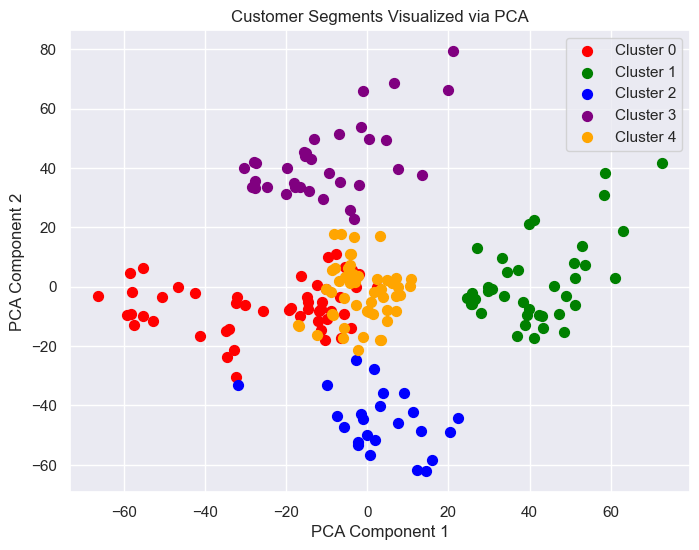

In [215]:
from sklearn.decomposition import PCA

#  Run PCA to reduce to 2D coz we have 4 cols if more than 3 do pca 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#apply pca on scaled data only
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Add cluster labels (assuming clustering already done)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# Step 6: Plot clusters using PCA components
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'purple', 'orange']

for i in range(X['clusters'].nunique()):
    plt.scatter(
        X[X['clusters'] == i]['PCA1'],
        X[X['clusters'] == i]['PCA2'],
        c=colors[i],
        label=f'Cluster {i}',
        s=50
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualized via PCA')
plt.legend()
plt.grid(True)
plt.show()


In [239]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,PCA1,PCA2
0,1,19,15,39,2,-31.922892,-32.938972
1,1,21,15,81,2,0.671520,-56.836381
2,0,20,16,6,0,-57.433777,-13.046530
3,0,23,16,77,2,-2.256021,-53.467702
4,0,31,17,40,0,-32.229121,-30.355661
